In [1]:
from matplotlib.pyplot import imshow
from IPython.display import display
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageChops
import cv2
import numpy as np
import glob, os

In [2]:
ls ..

data/    LICENSE.txt*  README.md*  test.py*   zizi-data/
docker/  models/       scripts/    train.py*  zizi-scripts/
imgs/    options/      script.sh   util/


In [24]:

# src = Image.open('results/test_img/000050.png')
# src2 = src.resize((960,1080))
# display(src2)

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

def make_img(im):
    # CV make invert BW
    #     im = cv2.imread('../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png')
    #     print(im.shape)
    im = cv2.resize(im, (832, 832)) # 832
    #     print(im.shape)
    im = im/255.0
    im_power_law_transformation = cv2.pow(im,0.01)
    im_PIL = Image.fromarray((im_power_law_transformation * 255).astype(np.uint8))
    # display(Image.fromarray((im * 255).astype(np.uint8)))
    im_invert = ImageOps.invert(im_PIL).convert('L')

    # make sil

    blur1 = im_invert.filter(ImageFilter.GaussianBlur(radius=2))
    im_sil = add_margin(blur1, 0, 200, 45, 0, color='#FFFFFF')
    # display(im_sil)

    # makeshadow

    blur = im_invert.filter(ImageFilter.GaussianBlur(radius=65)) #25

    enhancer = ImageEnhance.Contrast(blur)
    im_shadow = enhancer.enhance(1)
    # birghtness? gray - feeling of transparency

    im_shadow = add_margin(im_shadow, 45, 0, 0, 200, color='#FFFFFF')
    final_img_comp = ImageChops.multiply(im_shadow, im_sil)
    #     print(final_img.size)
    # display(final_img_comp)



    # Make final

    final_img = final_img_comp.crop((0, 0, 832, 832)) 
    #     print(final_img.size)

    return  final_img
    # display(final_img)



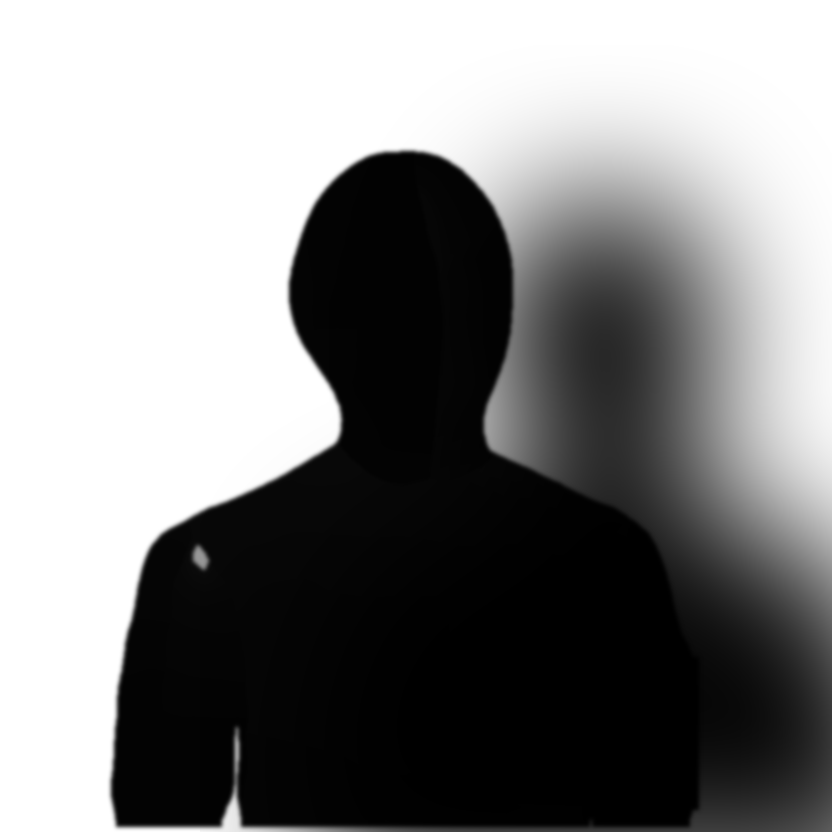

In [25]:
im = cv2.imread('../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005001_IUV.png')
display(make_img(im))


In [31]:
!mkdir ../zizi-data/datasets/acts/close/test_shadow/

mkdir: cannot create directory ‘../zizi-data/datasets/acts/close/test_shadow/’: File exists


In [32]:
# directory = "fiveyears-ruby-full"
# ../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png

for d in sorted(glob.glob("../zizi-data/datasets/acts/close/test_densepose/*")):
    print(os.path.basename(d))
    directory = os.path.basename(d)
    
    sdir = "../zizi-data/datasets/acts/close/test_shadow/"+directory+"/"

    if not os.path.exists(sdir):
        os.mkdir(sdir)

    for file in sorted(glob.glob("../zizi-data/datasets/acts/close/test_densepose/"+directory+"/*.png")):
        name = os.path.basename(file).replace('_IUV.png','')
        print(file)

        im = cv2.imread(file)
        
        make_img(im).save(sdir+name+".png")

fiveyears-ruby-close
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000001_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000002_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000003_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000004_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000005_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000006_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000007_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyea

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000099_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000100_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000101_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000102_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000103_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000104_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000105_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000106_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000107_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000108_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000109_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000110_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000198_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000199_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000200_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000201_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000202_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000203_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000204_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000205_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000206_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000207_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000208_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000209_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000303_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000304_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000305_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000306_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000307_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000405_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000406_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000493_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000494_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000495_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000496_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000497_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000498_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000499_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000504_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000591_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000592_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000593_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000594_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000595_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000596_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000597_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000598_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000599_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000600_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000601_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000602_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000690_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000691_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000692_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000693_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000694_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000695_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000696_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000697_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000698_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000699_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000700_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000701_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000788_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000789_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000790_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000791_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000792_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000793_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000794_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000795_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000796_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000797_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000798_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000799_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000886_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000887_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000888_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000889_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000890_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000891_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000892_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000893_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000894_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000895_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000896_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000897_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000989_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000990_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000991_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000992_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000993_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000994_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/000995_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001082_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001083_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001086_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001087_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001088_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001089_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001090_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001091_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001092_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001093_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001180_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001181_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001182_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001183_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001184_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001185_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001186_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001187_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001189_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001190_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001191_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001278_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001279_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001280_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001281_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001282_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001283_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001284_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001285_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001286_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001287_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001288_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001289_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001377_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001378_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001379_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001380_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001381_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001382_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001383_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001384_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001385_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001386_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001387_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001388_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001476_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001477_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001478_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001479_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001480_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001481_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001482_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001483_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001484_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001485_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001486_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001487_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001575_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001576_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001577_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001578_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001579_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001580_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001581_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001582_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001583_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001584_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001585_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001586_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001673_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001674_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001675_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001676_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001677_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001678_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001679_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001680_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001681_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001682_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001683_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001684_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001771_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001772_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001773_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001774_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001775_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001776_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001777_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001778_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001779_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001780_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001781_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001782_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001869_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001870_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001871_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001872_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001873_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001874_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001875_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001876_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001877_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001878_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001879_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001880_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001967_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001968_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001969_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001970_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001971_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001972_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001973_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001974_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001975_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001976_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001977_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/001978_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002065_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002066_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002067_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002068_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002069_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002070_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002071_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002072_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002073_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002074_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002075_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002076_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002164_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002165_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002166_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002167_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002168_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002169_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002170_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002171_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002172_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002173_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002174_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002175_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002262_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002263_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002264_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002265_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002266_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002267_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002268_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002269_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002270_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002271_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002272_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002273_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002361_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002362_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002363_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002364_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002367_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002368_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002369_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002370_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002371_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002372_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002460_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002461_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002470_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002471_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002558_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002559_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002560_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002561_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002562_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002563_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002564_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002565_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002566_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002567_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002568_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002569_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002660_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002661_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002662_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002663_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002664_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002665_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002666_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002667_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002761_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002762_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002763_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002764_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002765_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002858_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002859_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002860_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002861_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002862_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002863_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002956_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002957_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002958_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002959_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002960_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002961_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/002962_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003058_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003059_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003060_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003153_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003156_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003157_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003158_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003159_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003257_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003356_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003454_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003552_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003651_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003750_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003844_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003848_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003935_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003936_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003937_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003938_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/003946_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004045_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004132_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004133_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004143_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004230_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004231_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004232_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004234_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004241_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004329_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004340_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004427_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004428_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004429_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004430_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004438_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004525_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004526_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004527_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004528_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004529_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004531_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004532_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004536_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004623_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004624_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004625_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004626_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004627_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004628_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004629_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004630_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004631_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004632_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004633_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004634_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004722_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004723_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004724_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004725_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004726_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004727_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004728_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004729_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004730_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004731_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004732_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004733_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004820_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004821_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004822_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004823_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004824_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004825_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004826_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004827_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004828_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004829_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004830_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004831_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004918_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004919_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004920_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004921_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004922_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004923_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004924_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004925_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004926_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004927_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004928_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/004929_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005016_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005017_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005018_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005019_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005020_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005021_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005022_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005023_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005024_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005025_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005026_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005027_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005115_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005116_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005117_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005118_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005119_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005120_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005121_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005122_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005123_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005124_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005125_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005126_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005214_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005215_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005216_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005217_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005218_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005219_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005220_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005221_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005222_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005223_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005224_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005225_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005312_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005313_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005314_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005315_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005316_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005317_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005318_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005319_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005320_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005321_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005322_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005323_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005411_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005412_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005413_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005414_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005415_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005416_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005417_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005418_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005419_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005420_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005421_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005422_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005509_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005510_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005511_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005512_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005513_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005514_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005515_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005516_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005517_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005518_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005519_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005520_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005607_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005608_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005609_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005610_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005611_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005612_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005613_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005614_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005615_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005616_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005617_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005618_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005706_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005707_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005708_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005709_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005710_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005711_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005712_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005713_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005714_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005715_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005716_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005717_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005805_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005806_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005807_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005808_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005809_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005810_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005811_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005812_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005813_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005814_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005815_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005816_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005904_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005905_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005906_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005907_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005908_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005909_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005910_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005911_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005912_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005915_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006002_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006003_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006004_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006005_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006006_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006007_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006012_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006013_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006100_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006101_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006102_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006103_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006104_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006105_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006106_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006107_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006108_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006109_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006110_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006111_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006199_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006200_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006201_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006202_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006203_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006204_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006205_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006206_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006207_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006208_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006209_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006210_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006303_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006304_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006305_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006306_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006307_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006308_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006405_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006406_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006494_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006495_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006496_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006497_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006498_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006499_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006504_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006505_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006593_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006594_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006595_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006596_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006597_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006598_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006599_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006600_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006601_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006602_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006603_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006604_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006692_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006693_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006694_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006695_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006696_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006697_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006698_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006699_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006700_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006701_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006702_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006703_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006791_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006792_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006793_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006794_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006795_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006796_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006797_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006798_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006799_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006800_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006801_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006802_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006891_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006892_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006893_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006894_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006895_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006896_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006897_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006898_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006899_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006900_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006901_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006902_

../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006989_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006990_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006991_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006992_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006993_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006994_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006995_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006996_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006997_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006998_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/006999_IUV.png
../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/007000_

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000026_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000027_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000028_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000029_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000030_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000031_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000033_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000037_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000127_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000128_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000129_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000130_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000131_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000132_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000133_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000138_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000228_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000229_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000230_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000231_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000232_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000234_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000239_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000329_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000340_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000429_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000430_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000440_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000531_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000532_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000541_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000630_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000631_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000632_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000633_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000634_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000635_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000636_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000641_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000730_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000731_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000732_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000733_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000734_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000735_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000736_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000737_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000738_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000741_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000831_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000832_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000833_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000834_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000835_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000836_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000842_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000932_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000933_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000934_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000935_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000936_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000937_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000938_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/000943_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001033_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001043_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001132_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001133_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001143_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001234_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001244_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001344_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001444_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001544_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001633_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001634_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001635_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001636_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001644_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001733_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001734_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001735_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001736_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001737_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001738_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001744_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001833_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001834_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001835_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001836_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001844_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001934_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001935_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001936_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001937_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001938_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/001945_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002045_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002146_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002246_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002346_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002446_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002547_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002636_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002647_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002737_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002738_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002748_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002844_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002848_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002937_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002938_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/002948_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003048_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003148_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003248_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003349_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003450_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003550_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003651_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003751_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003844_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003851_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/003951_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004051_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004152_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004253_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004354_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004456_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004556_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004656_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004757_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004858_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004956_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004957_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/004958_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005058_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005059_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005153_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005156_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005157_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005158_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005159_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005160_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005258_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005259_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005260_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005358_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005359_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005360_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005456_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005457_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005458_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005459_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005460_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005557_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005558_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005559_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005560_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005660_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005661_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005761_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005858_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005859_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005860_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005861_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005862_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005956_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005957_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005958_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005959_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005960_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005961_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005962_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/005963_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006058_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006059_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006060_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006061_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006062_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006063_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006064_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006156_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006157_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006158_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006159_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006160_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006161_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006162_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006163_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006164_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006165_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006258_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006259_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006260_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006261_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006262_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006263_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006264_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006265_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006358_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006359_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006360_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006361_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006362_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006363_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006364_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006366_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006456_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006457_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006458_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006459_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006460_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006461_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006466_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006557_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006558_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006559_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006560_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006561_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006562_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006563_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006564_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006565_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006566_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006660_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006661_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006662_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006663_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006664_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006665_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006666_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006667_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006761_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006762_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006763_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006764_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006765_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006766_IUV.png
../zizi-data/datasets/acts/close/test_densepose/freedom-mark-close/006767_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000058_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000059_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000060_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000061_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000062_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000063_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000064_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000065_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000066_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000158_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000159_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000160_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000161_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000162_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000163_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000164_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000165_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000166_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000167_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000168_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000169_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000260_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000261_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000262_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000263_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000264_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000265_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000266_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000267_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000268_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000269_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000270_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000271_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000363_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000364_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000367_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000368_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000369_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000370_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000371_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000372_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000373_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000374_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000470_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000471_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000472_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000473_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000474_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000475_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000476_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000477_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000569_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000570_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000571_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000572_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000573_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000574_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000575_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000576_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000577_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000578_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000579_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000580_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000672_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000673_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000674_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000675_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000676_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000677_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000678_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000679_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000680_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000681_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000682_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000683_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000774_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000775_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000776_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000777_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000778_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000779_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000780_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000781_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000782_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000783_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000784_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000785_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000877_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000878_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000879_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000880_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000881_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000882_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000883_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000884_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000885_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000886_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000887_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000888_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000981_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000982_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000983_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000989_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000990_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000991_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/000992_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001086_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001087_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001088_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001089_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001090_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001091_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001092_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001093_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001094_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001095_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001186_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001187_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001189_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001190_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001191_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001192_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001193_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001194_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001195_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001196_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001197_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001288_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001289_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001290_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001291_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001292_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001293_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001294_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001299_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001390_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001391_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001392_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001393_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001394_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001401_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001493_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001494_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001495_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001496_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001497_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001498_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001499_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001504_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001596_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001597_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001598_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001599_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001600_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001601_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001602_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001603_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001604_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001605_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001606_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001607_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001698_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001699_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001700_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001701_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001702_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001703_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001704_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001705_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001706_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001707_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001708_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001709_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001801_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001802_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001803_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001804_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001805_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001806_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001807_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001808_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001809_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001810_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001811_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001812_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001903_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001904_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001905_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001906_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001907_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001908_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001909_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001910_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001911_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001912_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/001914_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002006_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002007_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002012_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002013_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002014_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002015_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002016_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002017_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002109_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002110_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002111_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002112_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002113_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002114_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002115_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002116_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002117_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002118_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002119_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002120_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002212_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002213_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002214_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002215_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002216_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002217_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002218_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002219_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002220_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002221_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002222_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002223_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002314_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002315_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002316_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002317_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002318_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002319_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002320_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002321_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002322_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002323_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002324_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002325_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002417_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002418_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002419_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002420_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002421_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002422_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002423_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002424_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002425_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002426_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002427_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002428_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002520_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002521_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002522_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002523_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002524_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002525_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002526_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002527_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002528_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002529_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002531_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002623_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002624_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002625_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002626_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002627_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002628_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002629_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002630_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002631_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002632_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002633_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002634_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002725_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002726_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002727_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002728_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002729_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002730_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002731_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002732_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002733_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002734_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002735_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002736_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002828_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002829_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002830_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002831_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002832_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002833_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002834_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002835_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002836_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002839_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002931_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002932_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002933_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002934_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002935_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002936_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002937_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002938_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/002942_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003033_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003044_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003146_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003249_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003352_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003455_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003557_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003659_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003761_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003858_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003859_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003860_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003861_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003862_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003863_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003956_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003957_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003958_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003959_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003960_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003961_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003962_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003963_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003964_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/003965_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004058_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004059_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004060_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004061_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004062_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004063_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004064_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004065_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004066_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004067_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004159_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004160_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004161_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004162_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004163_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004164_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004165_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004166_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004167_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004168_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004169_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004170_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004262_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004263_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004264_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004265_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004266_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004267_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004268_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004269_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004270_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004271_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004272_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004273_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004367_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004368_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004369_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004370_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004371_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004372_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004373_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004374_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004375_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004376_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004470_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004471_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004472_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004473_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004474_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004475_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004476_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004477_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004478_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004569_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004570_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004571_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004572_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004573_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004574_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004575_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004576_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004577_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004578_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004579_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004580_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004672_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004673_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004674_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004675_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004676_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004677_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004678_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004679_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004680_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004681_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004682_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004683_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004774_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004775_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004776_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004777_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004778_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004779_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004780_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004781_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004782_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004783_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004784_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004785_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004877_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004878_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004879_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004880_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004881_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004882_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004883_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004884_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004885_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004886_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004887_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004888_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004979_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004980_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004981_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004982_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004983_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004989_IUV.png
../zizi-data/datasets/acts/close/test_densepose/glass-lilly-close/004990_IUV.png
../zizi-data/datasets/acts/c

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000029_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000030_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000031_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000033_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000041_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000150_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000258_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000259_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000358_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000359_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000360_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000361_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000362_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000363_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000364_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000367_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000368_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000470_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000471_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000472_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000473_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000474_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000475_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000476_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000477_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000573_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000574_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000575_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000576_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000577_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000578_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000579_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000580_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000581_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000582_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000583_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000584_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000585_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000682_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000683_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000684_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000685_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000686_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000687_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000688_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000689_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000690_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000691_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000692_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000693_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000694_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000790_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000791_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000792_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000793_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000794_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000795_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000796_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000797_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000798_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000799_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000800_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000801_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000802_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000898_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000899_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000900_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000901_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000902_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000903_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000904_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000905_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000906_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000907_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000908_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000909_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/000910_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001006_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001007_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001012_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001013_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001014_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001015_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001016_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001017_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001018_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001114_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001115_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001116_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001117_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001118_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001119_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001120_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001121_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001122_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001123_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001124_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001125_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001126_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001222_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001223_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001224_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001225_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001226_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001227_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001228_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001229_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001230_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001231_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001232_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001234_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001342_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001451_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001557_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001558_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001559_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001560_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001660_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001661_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001662_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001663_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001664_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001665_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001666_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001667_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001668_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001669_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001766_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001767_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001768_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001769_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001770_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001771_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001772_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001773_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001774_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001775_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001776_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001777_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001778_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001875_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001876_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001877_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001878_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001879_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001880_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001881_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001882_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001883_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001884_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001885_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001886_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001887_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001989_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001990_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001991_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001992_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001993_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001994_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001995_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/001996_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002092_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002093_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002094_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002095_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002096_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002097_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002098_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002099_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002100_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002101_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002102_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002103_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002104_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002201_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002202_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002203_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002204_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002205_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002206_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002207_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002208_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002209_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002210_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002211_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002212_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002213_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002309_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002310_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002311_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002312_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002313_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002314_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002315_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002316_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002317_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002318_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002319_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002320_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002321_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002418_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002419_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002420_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002421_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002422_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002423_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002424_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002425_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002426_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002427_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002428_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002429_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002430_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002526_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002527_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002528_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002529_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002531_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002532_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002538_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002635_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002636_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002647_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002755_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002858_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002859_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002860_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002861_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002862_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002863_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002864_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002961_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002962_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002963_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002964_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002965_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002966_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002967_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002968_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002969_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002970_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002971_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002972_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/002973_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003069_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003070_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003071_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003072_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003073_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003074_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003075_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003076_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003077_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003078_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003079_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003080_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003081_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003177_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003178_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003179_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003180_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003181_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003182_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003183_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003184_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003185_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003186_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003187_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003189_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003285_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003286_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003287_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003288_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003289_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003290_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003291_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003292_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003293_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003294_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003297_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003393_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003394_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003405_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003504_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003505_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003506_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003507_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003508_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003509_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003510_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003511_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003512_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003513_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003610_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003611_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003612_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003613_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003614_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003615_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003616_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003617_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003618_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003619_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003620_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003621_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003622_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003719_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003720_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003721_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003722_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003723_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003724_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003725_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003726_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003727_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003728_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003729_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003730_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003731_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003828_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003829_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003830_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003831_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003832_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003833_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003834_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003835_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003836_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003840_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003936_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003937_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003938_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/003948_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004057_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004156_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004157_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004158_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004159_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004160_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004161_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004162_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004163_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004164_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004165_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004166_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004262_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004263_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004264_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004265_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004266_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004267_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004268_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004269_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004270_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004271_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004272_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004273_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004274_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004371_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004372_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004373_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004374_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004375_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004376_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004377_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004378_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004379_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004380_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004381_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004382_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004383_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004480_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004481_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004482_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004483_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004484_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004485_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004486_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004487_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004488_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004489_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004490_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004491_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004492_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004588_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004589_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004590_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004591_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004592_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004593_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004594_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004595_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004596_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004597_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004598_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004599_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004600_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004697_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004698_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004699_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004700_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004701_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004702_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004703_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004704_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004705_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004706_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004707_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004708_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004709_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004805_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004806_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004807_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004808_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004809_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004810_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004811_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004812_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004813_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004814_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004815_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004816_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004817_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004915_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004916_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004917_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004918_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004919_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004920_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004921_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004922_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004923_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004924_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/004925_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005021_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005022_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005023_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005024_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005025_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005026_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005027_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005028_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005029_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005030_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005031_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005033_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005130_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005131_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005132_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005133_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005142_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/iam-me-close/005250_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000029_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000030_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000031_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000033_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000040_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000130_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000131_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000132_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000133_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000141_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000231_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000232_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000234_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000242_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000343_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000444_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000544_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000633_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000634_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000635_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000636_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000644_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000733_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000734_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000735_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000736_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000737_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000738_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000744_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000833_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000834_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000835_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000836_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000844_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000933_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000934_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000935_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000936_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000937_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000938_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/000944_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001045_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001145_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001246_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001347_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001448_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001548_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001648_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001738_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001749_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001844_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001849_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001939_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001940_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/001950_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002050_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002150_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002250_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002350_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002450_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002551_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002651_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002752_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002844_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002852_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/002952_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003053_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003153_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003154_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003254_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003355_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003455_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003556_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003656_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003756_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003856_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/003956_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004056_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004153_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004156_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004256_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004356_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004456_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004457_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004557_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004657_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004757_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004857_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004956_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/004957_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005057_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005153_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005156_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005157_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005158_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005258_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005358_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005456_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005457_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005458_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005557_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005558_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005658_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005758_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005858_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005956_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005957_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/005958_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006058_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006153_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006156_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006157_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006158_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006258_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006358_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006451_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006452_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006453_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006456_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006457_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006458_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006557_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006558_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mighty-chiyo-close/006658_IUV.png
../zizi-data/dat

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000062_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000063_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000064_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000065_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000066_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000067_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000068_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000069_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000070_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000071_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000072_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000073_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000167_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000168_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000169_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000170_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000171_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000172_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000173_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000174_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000175_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000176_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000177_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000178_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000271_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000272_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000273_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000274_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000275_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000276_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000277_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000278_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000279_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000280_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000281_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000282_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000375_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000376_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000377_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000378_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000379_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000380_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000381_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000382_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000383_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000384_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000385_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/000386_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001358_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001359_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001360_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001361_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001456_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001457_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001458_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001459_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001460_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001461_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001559_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001560_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001561_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001562_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001563_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001564_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001565_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001566_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001567_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001568_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001569_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001570_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001663_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001664_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001665_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001666_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001667_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001668_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001669_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001670_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001671_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001672_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001673_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001674_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001768_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001769_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001770_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001771_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001772_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001773_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001774_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001775_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001776_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001777_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001778_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001779_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001872_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001873_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001874_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001875_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001876_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001877_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001878_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001879_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001880_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001881_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001882_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001883_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001977_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001978_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001979_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001980_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001981_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001982_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001983_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/001988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002081_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002082_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002083_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002086_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002087_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002088_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002089_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002090_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002091_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002092_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002186_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002187_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002189_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002190_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002191_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002192_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002193_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002194_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002195_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002196_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002197_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002291_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002292_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002293_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002294_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002405_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002406_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002504_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002505_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002506_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002507_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002508_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002509_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002510_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002511_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002605_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002606_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002607_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002608_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002609_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002610_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002611_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002612_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002613_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002614_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002615_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002616_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002709_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002710_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002711_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002712_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002713_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002714_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002715_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002716_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002717_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002718_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002719_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002720_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002813_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002814_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002815_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002816_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002817_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002818_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002819_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002820_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002821_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002822_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002823_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002824_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002917_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002918_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002919_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002920_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002921_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002922_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002923_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002924_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002925_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002926_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002927_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/002928_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003022_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003023_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003024_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003025_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003026_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003027_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003028_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003029_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003030_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003031_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003033_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003127_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003128_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003129_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003130_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003131_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003132_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003133_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003231_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003232_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003234_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003341_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003342_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003343_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003344_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003345_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003447_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003448_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003449_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003450_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003761_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003762_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003763_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003858_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003859_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003860_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003861_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003862_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003863_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003864_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003865_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003866_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003867_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003868_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003962_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003963_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003964_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003965_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003966_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003967_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003968_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003969_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003970_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003971_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003972_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/003973_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004067_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004068_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004069_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004070_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004071_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004072_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004073_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004074_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004075_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004076_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004077_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004078_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004171_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004172_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004173_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004174_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004175_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004176_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004177_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004178_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004179_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004180_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004181_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004182_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004276_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004277_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004278_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004279_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004280_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004281_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004282_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004283_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004284_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004285_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004286_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004287_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004381_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004382_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004383_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004384_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004385_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004386_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004387_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004388_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004389_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004390_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004391_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004392_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004485_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004486_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004487_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004488_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004489_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004490_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004491_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004492_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004493_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004494_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004495_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004496_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004589_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004590_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004591_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004592_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004593_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004594_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004595_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004596_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004597_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004598_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004599_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004600_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004693_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004694_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004695_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004696_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004697_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004698_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004699_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004700_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004701_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004702_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004703_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004704_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004797_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004798_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004799_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004800_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004801_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004802_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004803_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004804_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004805_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004806_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004807_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004808_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004903_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004904_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004905_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004906_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004907_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004908_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004909_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004910_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004911_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004912_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/mylife-me-close/004914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/myli

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000086_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000087_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000088_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000089_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000090_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000091_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000092_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000093_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000094_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000095_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000096_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000189_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000190_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000191_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000192_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000193_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000194_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000195_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000196_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000197_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000198_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000199_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000291_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000292_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000293_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000294_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000302_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000405_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000406_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000498_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000499_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000504_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000505_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000506_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000507_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000508_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000509_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000601_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000602_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000603_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000604_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000605_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000606_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000607_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000608_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000609_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000610_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000611_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000612_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000705_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000706_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000707_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000708_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000709_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000710_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000711_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000712_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000713_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000714_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000715_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000716_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000808_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000809_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000810_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000811_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000812_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000813_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000814_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000815_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000816_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000817_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000818_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000819_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000911_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000912_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000915_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000916_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000917_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000918_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000919_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000920_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000921_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/000922_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001015_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001016_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001017_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001018_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001019_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001020_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001021_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001022_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001023_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001024_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001025_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001026_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001118_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001119_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001120_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001121_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001122_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001123_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001124_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001125_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001126_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001127_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001128_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001129_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001221_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001222_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001223_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001224_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001225_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001226_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001227_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001228_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001229_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001230_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001231_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001232_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001324_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001325_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001326_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001327_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001328_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001329_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001335_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001428_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001429_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001430_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001439_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001531_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001532_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001542_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001634_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001635_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001636_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001645_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001737_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001738_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001748_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001844_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001852_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/001955_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002058_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002151_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002152_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002153_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002154_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002155_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002156_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002157_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002158_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002159_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002160_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002161_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002258_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002259_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002260_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002261_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002262_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002263_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002264_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002265_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002358_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002359_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002360_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002361_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002362_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002363_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002364_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002367_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002368_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002369_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002461_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002470_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002471_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002472_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002565_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002566_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002567_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002568_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002569_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002570_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002571_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002572_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002573_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002574_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002575_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002576_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002668_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002669_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002670_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002671_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002672_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002673_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002674_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002675_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002676_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002677_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002678_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002679_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002771_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002772_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002773_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002774_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002775_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002776_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002777_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002778_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002779_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002780_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002781_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002782_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002874_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002875_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002876_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002877_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002878_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002879_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002880_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002881_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002882_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002883_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002884_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002885_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002978_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002979_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002980_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002981_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002982_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002983_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/002989_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003082_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003083_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003086_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003087_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003088_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003089_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003090_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003091_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003092_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003093_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003186_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003187_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003189_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003190_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003191_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003192_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003193_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003194_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003195_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003196_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003197_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003290_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003291_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003292_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003293_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003294_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003301_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003394_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003405_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003498_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003499_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003504_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003505_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003506_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003507_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003508_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003509_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003602_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003603_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003604_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003605_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003606_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003607_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003608_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003609_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003610_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003611_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003612_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003613_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003705_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003706_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003707_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003708_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003709_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003710_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003711_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003712_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003713_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003714_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003715_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003716_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003809_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003810_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003811_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003812_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003813_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003814_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003815_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003816_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003817_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003818_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003819_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003820_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003912_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003915_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003916_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003917_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003918_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003919_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003920_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003921_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003922_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/003923_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004016_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004017_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004018_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004019_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004020_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004021_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004022_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004023_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004024_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004025_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004026_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004027_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004119_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004120_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004121_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004122_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004123_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004124_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004125_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004126_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004127_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004128_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004129_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004130_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004223_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004224_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004225_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004226_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004227_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004228_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004229_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004230_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004231_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004232_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004234_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004327_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004328_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004329_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004338_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004442_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004545_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004649_IUV.png
../zizi-data/datasets/acts/close/test_de

../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/nancy-ruby-close/004752_IUV.png
../zizi-data/datasets/acts/close/test_de